In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!python --version


#️⃣Problem Statment: To build a deep learning model using Recurrent Neural Networks (RNN) or Long Short-Term Memory (LSTM) networks that can automatically determine the sentiment (positive or negative) of movie reviews from the IMDb dataset. The model should learn from the textual data,extract meaningful patterns using word embeddings (Word2Vec or GloVe),and generalize well to unseen reviews.


In [74]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [75]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [76]:
df.shape

(50000, 2)

In [77]:
df['sentiment'][1]

'positive'

In [78]:
texts = df['review'].astype(str).tolist()
labels = df["sentiment"].astype(str).tolist()

In [79]:
labels = [1 if i == "positive" else 0 for i in labels]

In [80]:
labels[1:5]

[1, 1, 0, 1]

In [81]:
texts[1:3]

['A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well 

In [82]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token = "<oov>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

padded_sequences = pad_sequences(sequences, padding="post", maxlen = 100)

In [83]:
padded_sequences[1:3]

array([[9720,   32,    2, 1826,    6,    1, 7367, 6595,   22,   62,    7,
          10,   70,  279,    2,  148,   19,   10,    7,    4,    1,  408,
           3, 2407,  413,    4, 4340,  354,   43,   28,    5,    2,   79,
           1,    5,  203,    3,   25,  115,    8,    8,    2, 1848,   63,
         271,  345,   17,    2,  121,  178,    2, 1030,    5,    2, 2925,
          61,  249,   72,  357,    2, 2207,    1, 3128, 1290, 1193,   92,
        4912,   10,  298,   21,  261, 1831,    3,  261, 4593,  584,   17,
           2,  135, 3691,    1,    3,    1,    3,    2,  731,  584,    5,
          66, 1055,   17,    1,    1,    1,  171, 2298,   24, 1978,   70,
         222],
       [3060,   13, 2972, 2051,    7,  131, 1404,    9, 1140,    5,    2,
         397,  107,    5,  177,   26, 2080,    6,  113,    8,    8,   12,
          14,    2,   89,  483, 1452,   31,   28,    5,    1, 1318,    9,
         154, 3025,   11,  132,    4, 2122,  137,  199,  111,   76, 1509,
          17, 8928,    

In [84]:
len(padded_sequences)

50000

In [85]:
len(labels)

50000

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [87]:
len(X_train)

40000

In [88]:
len(y_train)

40000

In [89]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Flatten, LSTM

model = Sequential()

model.add(Embedding(input_dim=10000, output_dim=100))
model.add(SimpleRNN(64, activation="relu", return_sequences=True))
model.add(SimpleRNN(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.build(input_shape=(None, 100))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 100, 64)             │          10,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,013,697 (3.87 MB)

 Trainable params: 1,013,697 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [92]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9383 - loss: 0.1633 - val_accuracy: 0.8469 - val_loss: 0.4199
Epoch 2/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9669 - loss: 0.0941 - val_accuracy: 0.8570 - val_loss: 0.4239
Epoch 3/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9806 - loss: 0.0602 - val_accuracy: 0.8565 - val_loss: 0.5291
Epoch 4/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9828 - loss: 0.0514 - val_accuracy: 0.8495 - val_loss: 0.5540


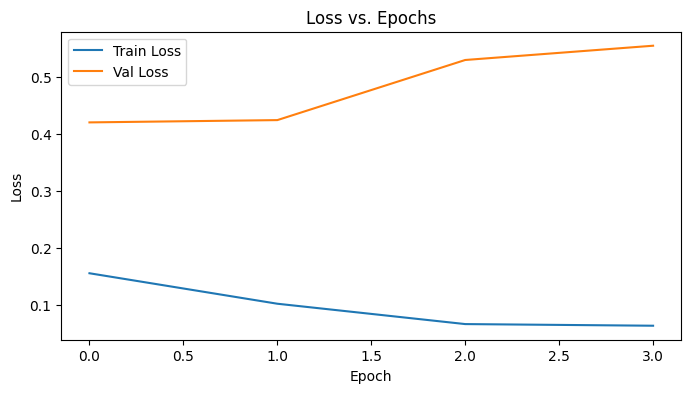

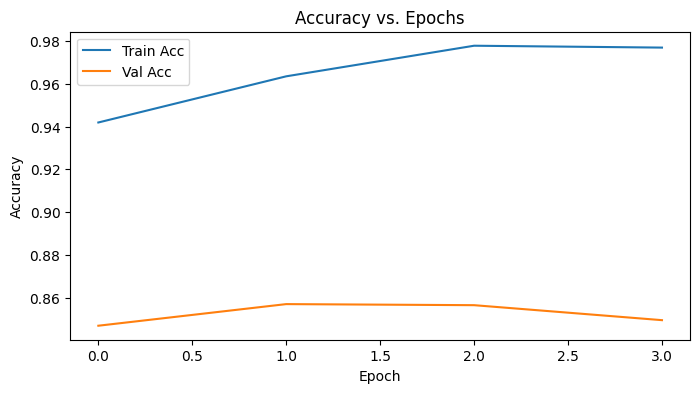

In [93]:
# ‘history’ was returned by model.fit(...)
import matplotlib.pyplot as plt

# 1) Plot training & validation loss over epochs
plt.figure(figsize=(8, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 2) Plot training & validation accuracy over epochs
plt.figure(figsize=(8, 4))
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [94]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5540354251861572
Test accuracy: 0.8495000004768372


In [104]:
test = "I loved the movie, it was fantastic!"
test_sequence = tokenizer.texts_to_sequences([test])

print("Tokenized:", test_sequence)

Tokenized: [[11, 432, 2, 18, 10, 14, 800]]


In [105]:
padded_test = pad_sequences(test_sequence, padding="post", maxlen = 100)

In [106]:
padded_test

array([[ 11, 432,   2,  18,  10,  14, 800,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int32)

In [107]:
model.predict(padded_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.8217373]], dtype=float32)